In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:
def update_rt(rt,st,dt,v0,L,const_vel):
    if const_vel:
        rdt = rt + dt*v0*st
    else:
        rdt = rt + dt*v0[:,None]*st
    return np.mod(rdt,L)

def update_thetat(thetat,rt,R0,N):
    #this is for the simplest vicsek model. I'll consider here a gaussian noise with the mean in the direction of the
    #local average and a variance of pi.
    
    theta_dt = thetat
    
    for ii in range(N):
        
        r = rt[ii,:]
        
        centered = np.mod(rt - r[None,:],L)
        d = np.sqrt(np.square(centered[:,0]) + np.square(centered[:,1]))
        #computing distances to the particle of interest
        
        tloc = thetat[d < R0]
        # local ts, obtained by filtering thetas by a distance cutoff
        
        avt = np.mean(tloc)
        
        theta_dt[ii] = np.mod(avt + np.random.normal(0,1),2*np.pi)
    return theta_dt

def update_st(thetat,N):
    st = np.zeros((N,2))
    
    st[:,0] = np.cos(thetat)
    st[:,1] = np.sin(thetat)
    
    return st
    

In [14]:
"""
The parameters of the simulation box and system size
"""
L = 50
#dimension of the square box

rho = 0.3
#density of particles in u^-2

N = np.int(L*L*rho)
#number of particles
"""
"""

"""
Dynamical quantities
"""
tfinal = 1000
dt = 1

R0 = L/3
#the neighborhood dimension

const_vel = True

if const_vel:
    v0 = 1
    #Constant velocity of the particles.
else:
    v0 = np.random.normal(1,0.3,N)
    #random initial velocities
    
    #v0 = 2*(np.round(np.random.rand(N)) - 0.5)
    #opposite velocities
"""
"""

"""
Initial condition
"""
thetat = 2*np.pi*np.random.rand(N)

rt = np.zeros((N,2))
rt[:,0] = L*np.random.rand(N)
rt[:,1] = L*np.random.rand(N)

st = update_st(thetat,N)
"""
"""

"""
Storage and visualization
"""
vis = True
vis_period = 10
"""
"""

print("ready to go")

ready to go


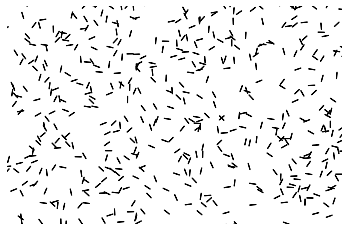

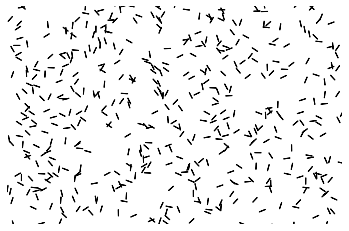

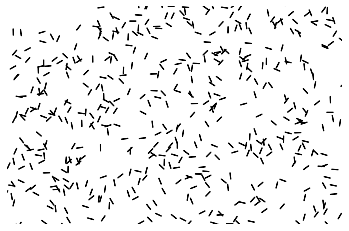

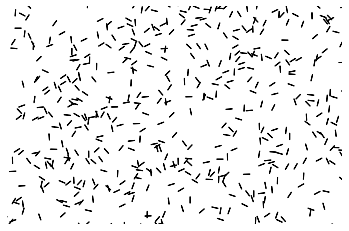

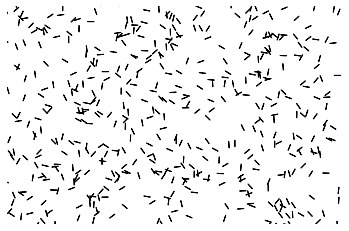

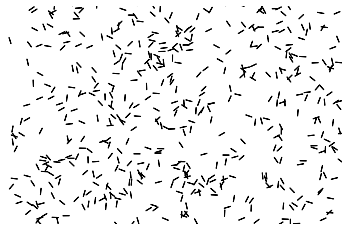

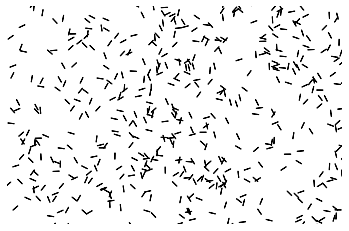

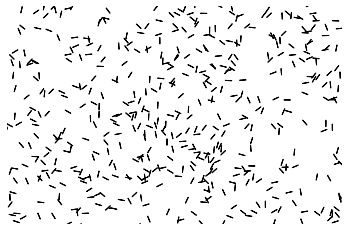

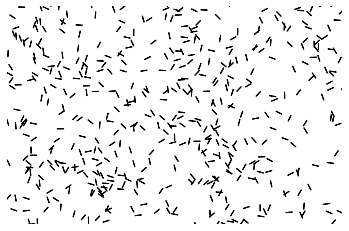

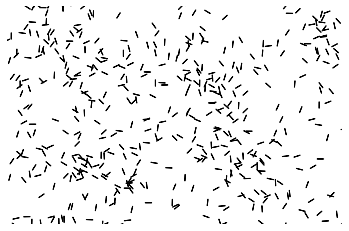

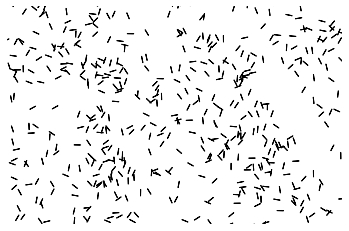

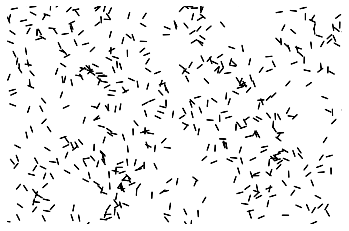

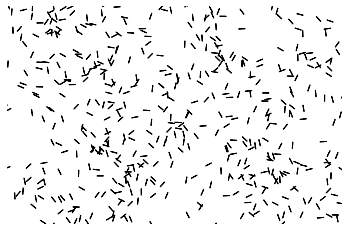

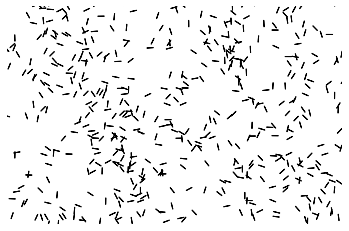

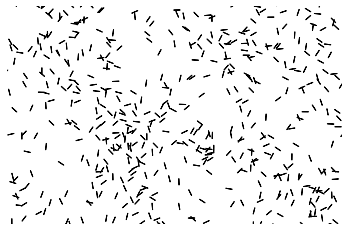

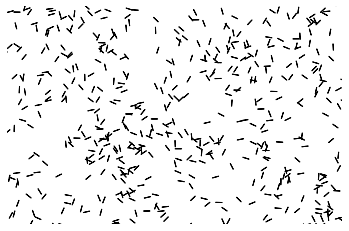

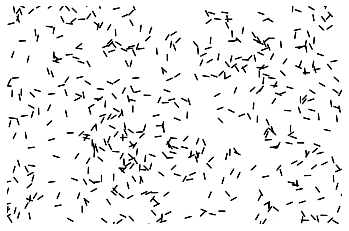

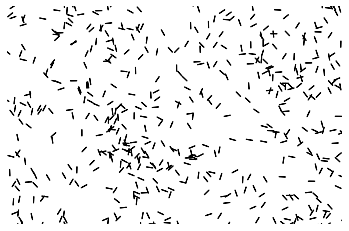

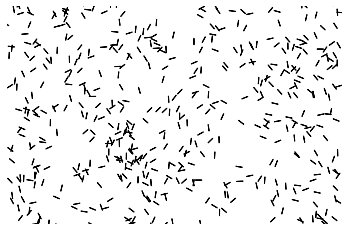

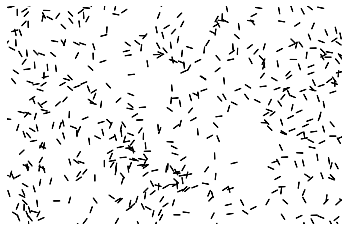

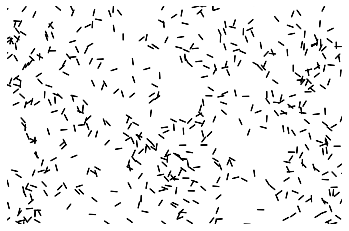

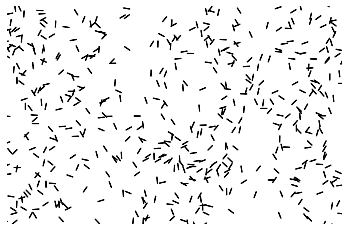

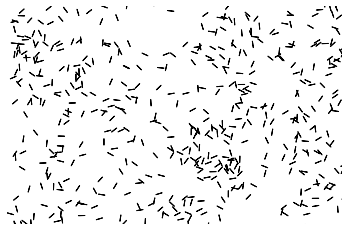

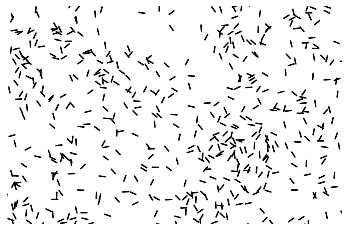

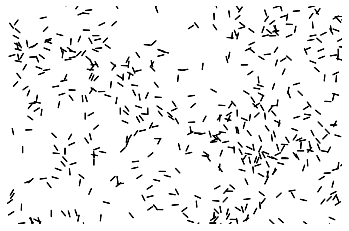

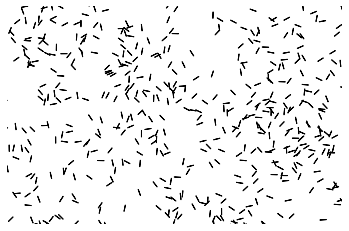

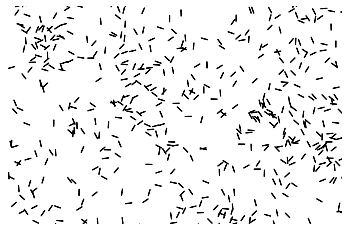

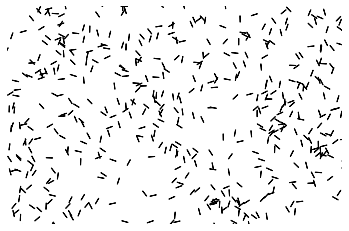

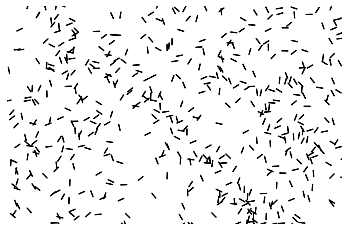

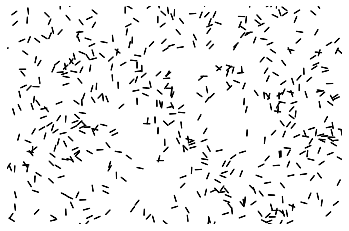

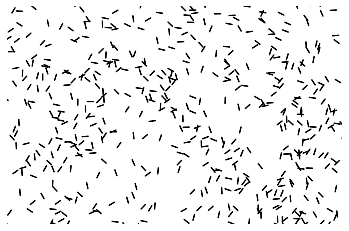

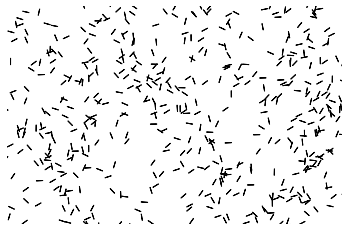

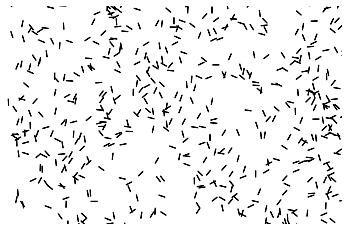

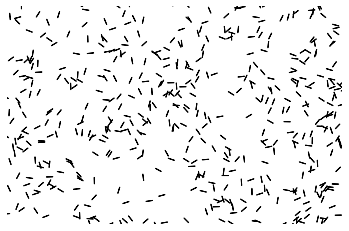

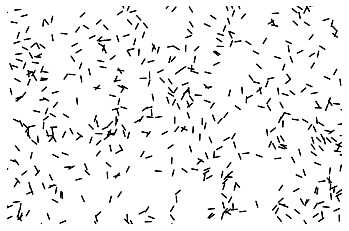

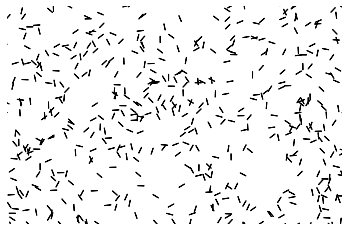

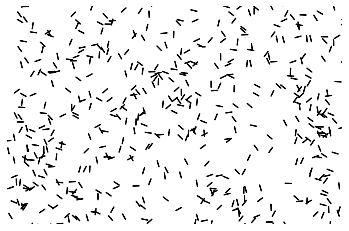

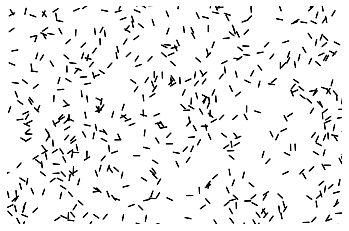

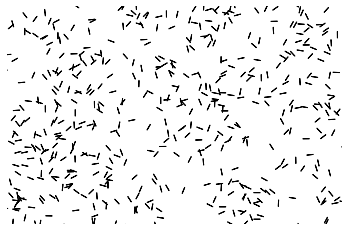

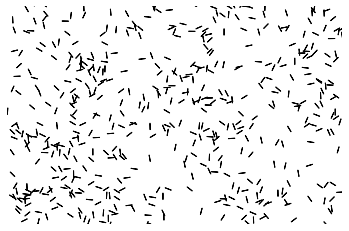

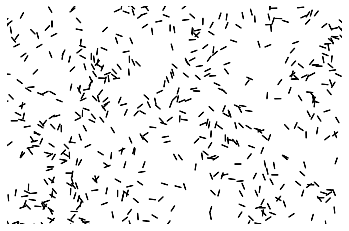

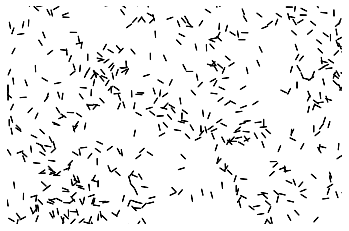

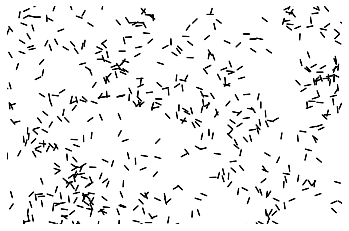

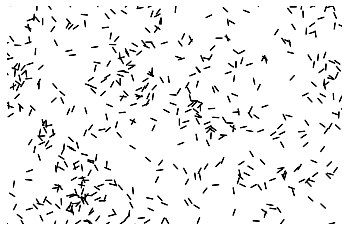

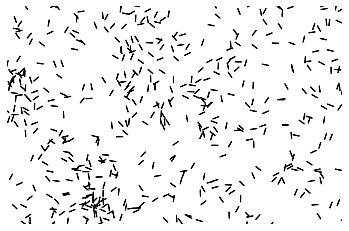

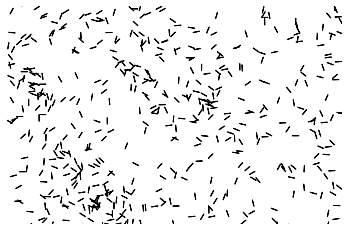

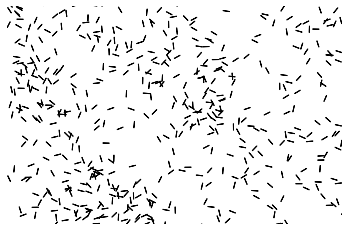

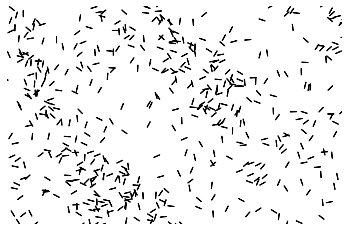

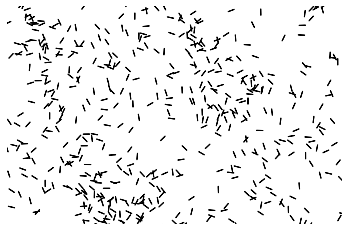

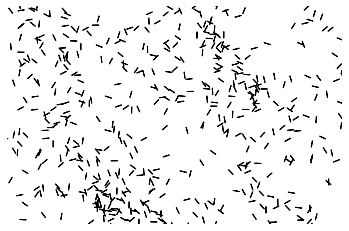

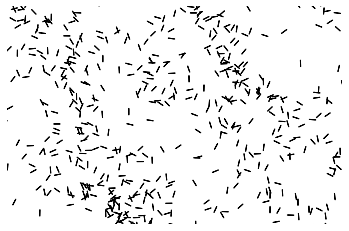

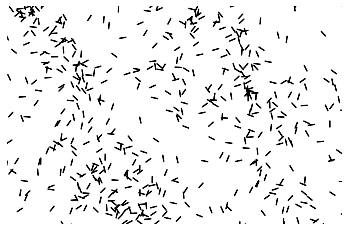

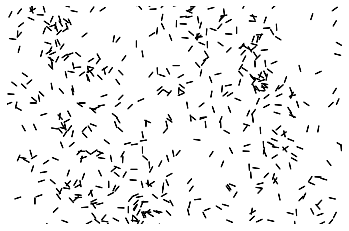

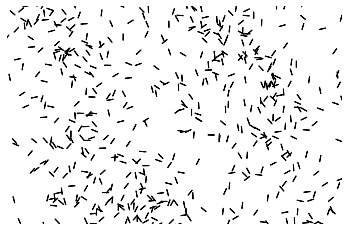

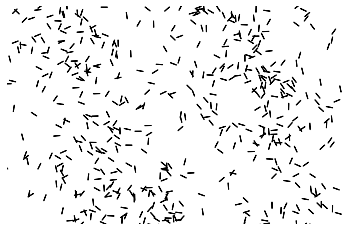

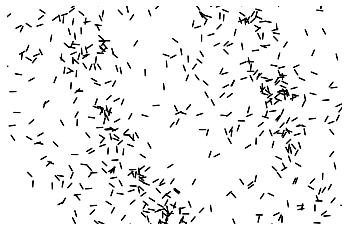

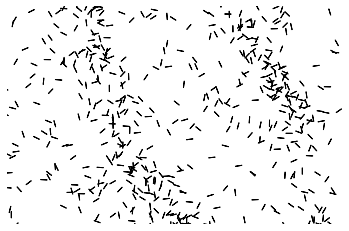

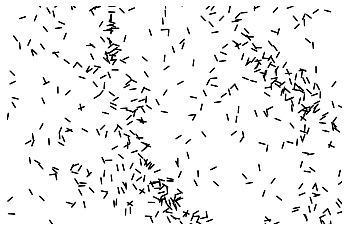

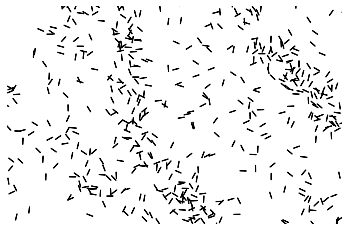

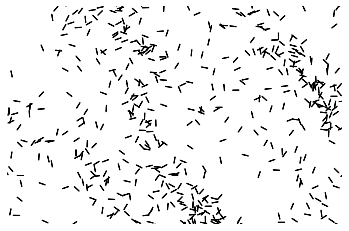

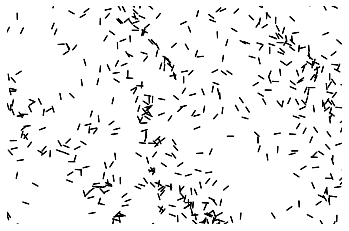

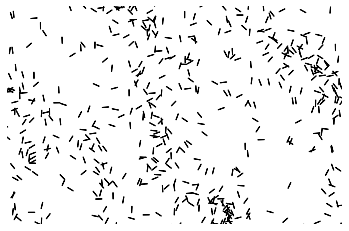

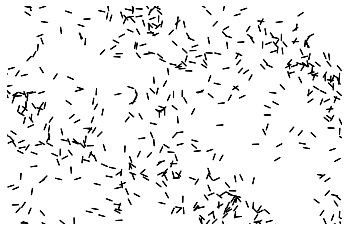

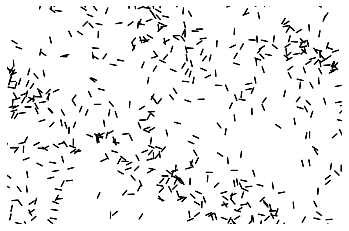

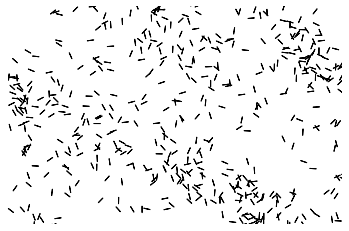

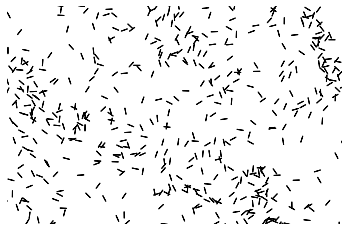

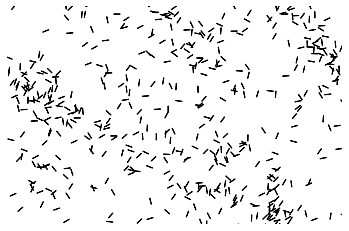

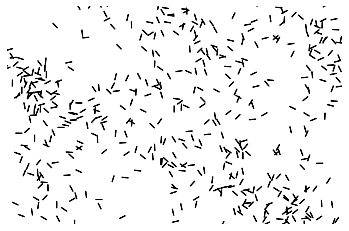

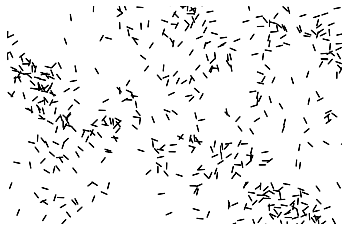

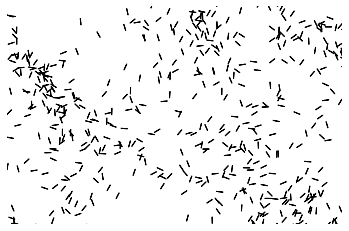

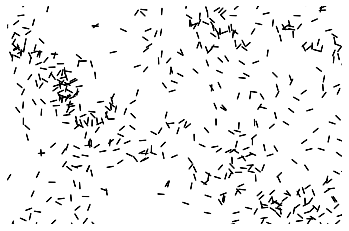

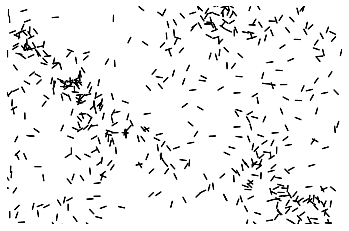

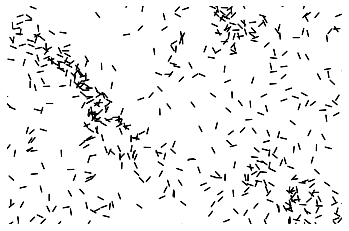

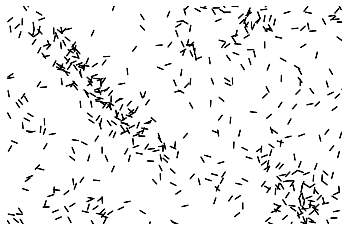

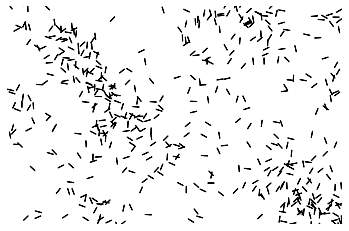

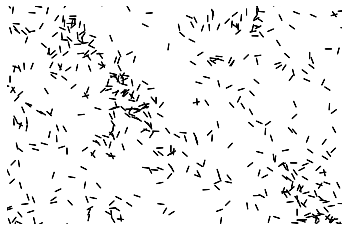

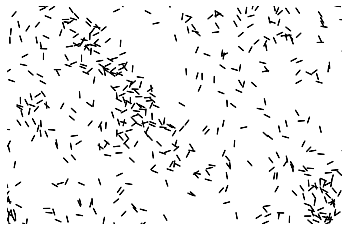

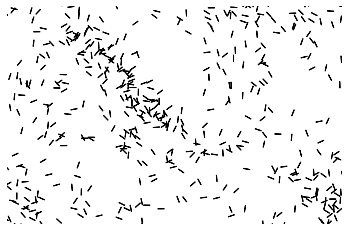

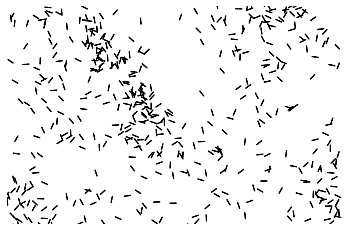

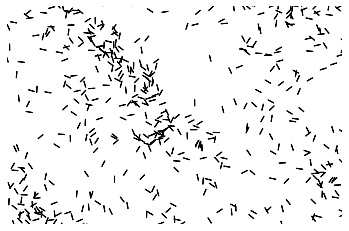

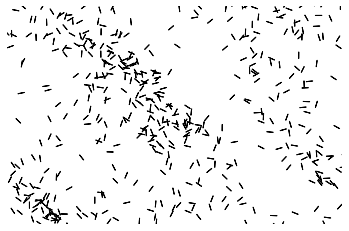

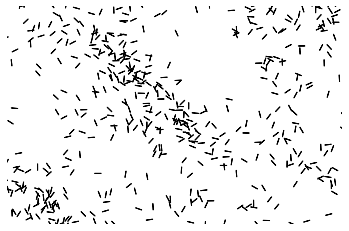

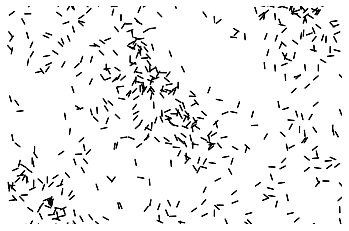

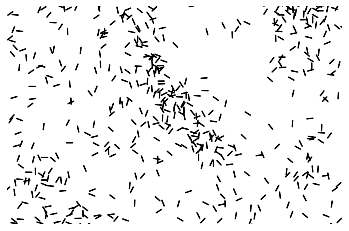

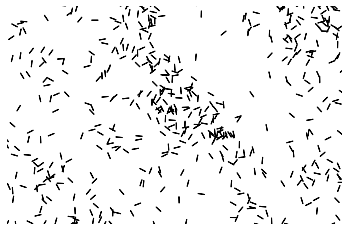

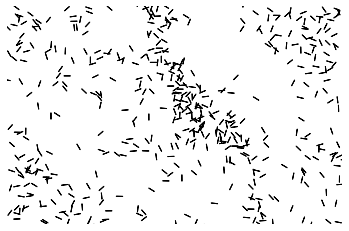

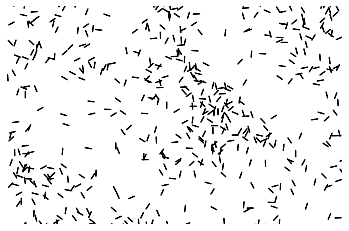

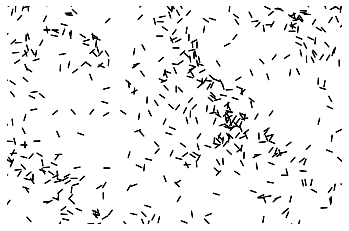

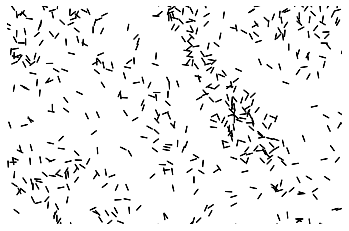

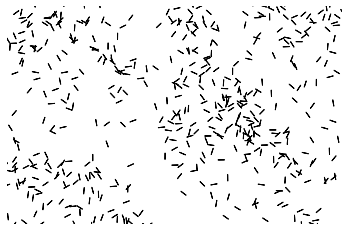

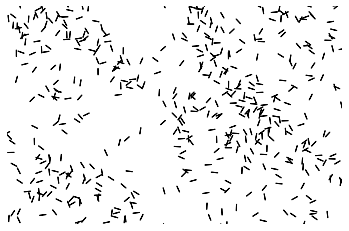

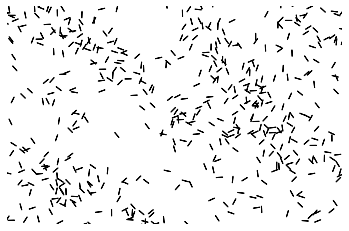

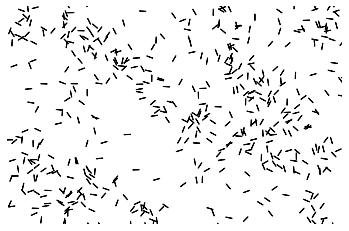

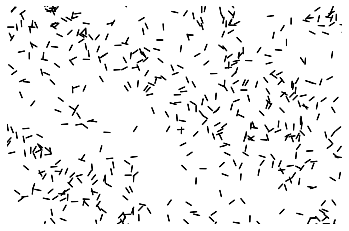

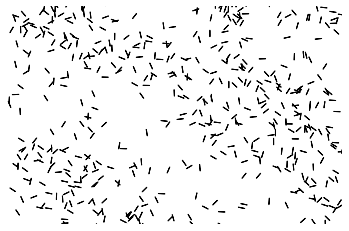

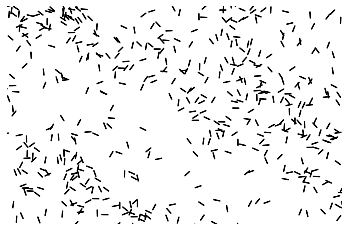

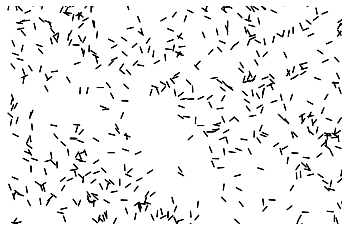

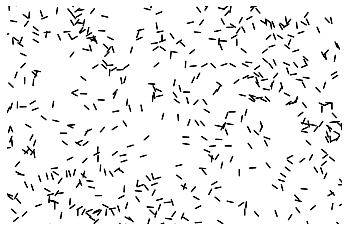

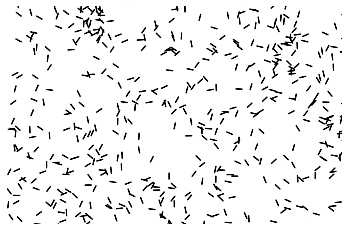

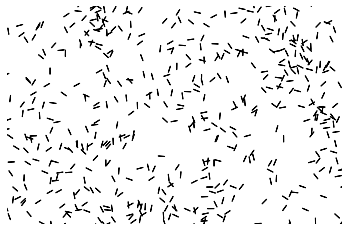

In [15]:
"""
Run the actual simulation
"""


ims = []

for tt in range(0,tfinal,dt):
    
    if vis & (tt%vis_period == 0):
        
        #print('tt = %s' %tt)
        
        ax = plt.axes()
        
        for uu in range(N):
            x,y = rt[uu,:]
            u,v = st[uu,:]
            ax.arrow(x,y,u,v,color = 'k')
        
        #plt.quiver(rt,st, color = 'k')
        #ax.scatter(rt[:,0],rt[:,1],c = 'k')
        plt.axis('equal')
        plt.axis('off')
        plt.xlim([0,L])
        plt.ylim([0,L])
        img = fig
        plt.show()
        #ims.append(img)
    
    rtdt = update_rt(rt,st,dt,v0,L,const_vel)
    thetas = update_thetat(thetat,rt,R0,N)
    #advance the positions and orientations forward dt
    
    rt = rtdt
    thetat = thetas
    st = update_st(thetat,N)
    #update arrays simultaneously


#ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)







(array([15., 10.,  9., 13., 12., 11.,  9., 12., 17., 17.]),
 array([ 0.20492779,  5.16440023, 10.12387268, 15.08334513, 20.04281758,
        25.00229002, 29.96176247, 34.92123492, 39.88070737, 44.84017981,
        49.79965226]),
 <a list of 10 Patch objects>)

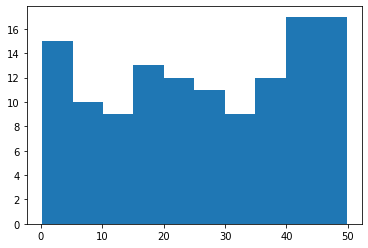

In [21]:
plt.hist(rt[:,1])

In [54]:
t = 0
np.size(t)

1